Nama : Ryan Fadhilah Faizal Hakim

NRP : 2C2220007

Subject : SVC

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [122]:
# Muat data
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Tampilkan 5 data pertama
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [124]:
data['y'].value_counts()

,count
y,
no,36548
yes,4640


In [125]:
# Pisahkan data fitur dan target
X = data.drop('y', axis=1)
y = data['y']

# Ubah target menjadi 0 dan 1 (yes/no)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ubah fitur kategorikal menjadi numerik
X = pd.get_dummies(X, drop_first=True)


In [126]:
# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [127]:
# Buat dan latih model SVM
svm_model_lin = SVC(kernel='linear')
svm_model_lin.fit(X_train, y_train)


SVC(kernel='linear')

In [128]:
# Prediksi data uji
y_pred = svm_model_lin.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10725   243]
 [  950   439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.64      0.32      0.42      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357



Latihan



1.   Buat interpretasi dari hasil evaluasi di atas
2.   Latih model SVM menggunakan kernel polyomial, RBF, dan sigmoid. masing-masing, dan tampilkan hasil classification_report untuk setiap kernel. \
  2.1 Berdasarkan f1-score dari hasil evaluasi, tentukan kernel mana yang memberikan hasil terbaik.
3. Untuk kernel poly, coba berbagai nilai degree (misalnya 2, 3, dan 4). Temukan nilai degree yang memberikan hasil terbaik.
4. Untuk kernel rbf, coba beberapa nilai C (misalnya 0.1, 1, dan 10). Tentukan nilai C terbaik berdasarkan f1-score.
5. Dengan menggunakan kernel dan parameter terbaik dari hasil latihan di atas (soal 3 dan 4), tuliskan interpretasi singkat mengenai precision, recall, f1-score, dan confusion matrix yang dihasilkan.
6. Berdasarkan soal 3 dan 4 jelaskan mengapa kernel tertentu mungkin lebih cocok dibandingkan yang lain dalam dataset ini.

https://scikit-learn.org/1.5/modules/svm.html


# **Soal 1**

1. Buat interpretasi dari hasil evaluasi di atas

**Jawaban Soal 1**

1. saya buatkan visualisasi dengan menggunakan confusion matrix untuk mempermudah pembacaan interpretasi model SVM Linear Kernel

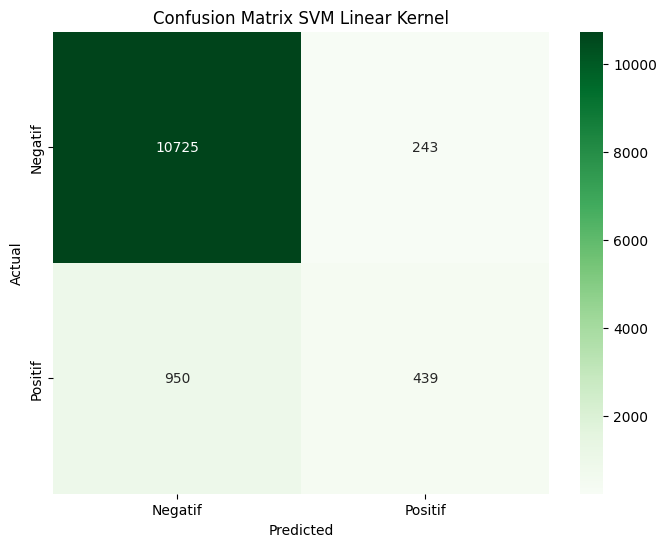

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM Linear Kernel')
plt.show()

* Dari confusion matrix model SVM dengan kernel Linear (Linear Kernel) di atas menunjukkan bahwa terdapat Jumlah prediksi benar untuk kelas 0 (negatif) atau disebut **True Negatives** sebanyak 10725. Jumlah prediksi salah untuk kelas 0 (prediksi positif, tetapi sebenarnya negatif) atau **False Positives** sebanyak 243. Jumlah prediksi salah untuk kelas 1 (prediksi negatif, tetapi sebenarnya positif) atau **False Negatives** sebanyak 950. dan Jumlah prediksi benar untuk kelas 1 (positif) atau **True Positives** sebanyak 439.


Selanjutnya saya akan menginterpretasikan `classification_report` dari model *SVM dengan kernel linear*.

```
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.64      0.32      0.42      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357

```


* Nilai `Precision` untuk **kelas 0** adalah *92%* yang artinya dari semua prediksi positif untuk kelas 0, 92% benar-benar positif. Nilai `Precision` untuk **kelas 1** adalah *64%* yang artinya dari semua prediksi positif untuk kelas 1, hanya 64% yang benar-benar positif. Nilai `Recall` untuk **kelas 0** adalah *98%* yang artinya 98% berhasil diprediksi dengan benar. Nilai `Recall` untuk **kelas 1** adalah *32%* yang artinya 32% berhasil diprediksi dengan benar.

*   `F1-Score`:
**  `F1-Score` untuk kelas 0: 0.95 —
    Menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 0.
**  `F1-Score` untuk kelas 1: 0.42 —
    Menunjukkan kinerja yang kurang baik untuk kelas 1, di mana terdapat trade-off antara precision dan recall.

*   `Macro Average`:
**  `Precision`: 0.78
**  `Recall`: 0.65
**  `F1-Score`: 0.69
**  Ini menunjukkan bahwa model memiliki
    kinerja yang kurang baik pada kelas minoritas (kelas 1).

*   `Weighted Average`:
**  Menunjukkan hasil yang lebih baik (0.89 untuk `precision` dan 0.90 untuk `recall`) karena memperhitungkan jumlah data di setiap kelas. Ini berarti model lebih baik dalam memprediksi kelas yang lebih besar (kelas 0).


Kesimpulan saya adalah untuk model menunjukkan performa yang sangat baik untuk kelas 0 tetapi memiliki masalah dalam mendeteksi kelas 1 dengan nilai `Recall` sebesar 32%  hal ini terjadi karena jumlah sample dari kelas 1 itu lebih sedikit daripada jumlah sample kelas 0.

Untuk memperkuat jawaban di atas, saya buktikan bahwa terdapat *imbalance* pada datasets

In [130]:
data['y'].value_counts()

,count
y,
no,36548
yes,4640


Data dengan **kelas 0 (no)** berjumlah *36548* data sedangkan untuk **kelas 1 (yes)** berjumlah *4640* data, sehingga terjadi *imbalance* pada data yang menyebabkan model lebih banyak belajar pola dari kelas 0

---

# **Soal 2**

2. Latih model SVM menggunakan kernel polynomial, RBF, dan sigmoid. masing-masing, dan tampilkan hasil classification_report untuk setiap kernel.

    2.1. Berdasarkan f1-score dari hasil evaluasi, tentukan kernel mana yang memberikan hasil terbaik.

**Jawaban Soal 2**

Pertama saya akan lakukan balancing dengan melakukan undersampling pada datasets dengan menggunakan:


In [131]:
!pip install imbalanced-learn

defining ulang untuk feature (X) dan label (y)

In [132]:
X = data.drop('y', axis=1)
y = data['y']

Proses Undersampling

In [133]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

y_resampled.value_counts()

,count
y,
no,4640
yes,4640


Data di atas sudah seimbang untuk setiap kelas nya dengan:

```
Kelas 0 (no)  : 4640
Kelas 1 (yes) : 4640
```

In [134]:
# Ubah target menjadi 0 dan 1 (yes/no)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_resampled)

# Ubah fitur kategorikal menjadi numerik
X = pd.get_dummies(X_resampled, drop_first=True)


In [135]:
# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model SVM Linear Kernel Setelah Undersampling

In [136]:
# Buat dan latih model SVM
svm_model_lin = SVC(kernel='linear')
svm_model_lin.fit(X_train, y_train)


SVC(kernel='linear')

In [137]:
# Prediksi data uji
y_pred = svm_model_lin.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1181  216]
 [ 119 1268]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784



### Model SVM Polynomial Kernel Setelah Undersampling

In [138]:
# Buat dan latih model SVM
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(X_train, y_train)


SVC(kernel='poly')

In [139]:
# Prediksi data uji
y_pred = svm_model_poly.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1199  198]
 [ 202 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1397
           1       0.86      0.85      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



### Model SVM RBF Kernel Setelah Undersampling

In [140]:
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

SVC()

In [141]:
y_pred = svm_model_rbf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1179  218]
 [ 129 1258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784



### Model SVM Sigmoid Kernel Setelah Undersampling

In [142]:
svm_model_sigmoid = SVC(kernel='sigmoid')
svm_model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [143]:
y_pred = svm_model_sigmoid.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1142  255]
 [ 208 1179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1397
           1       0.82      0.85      0.84      1387

    accuracy                           0.83      2784
   macro avg       0.83      0.83      0.83      2784
weighted avg       0.83      0.83      0.83      2784



### Rangkuman evaluasi (Classification Report) setiap kernel

Model SVM Linear Kernel Setelah Undersampling
```
Confusion Matrix:
[[1181  216]
 [ 119 1268]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784

```

Model SVM Polynomial Kernel Setelah Undersampling
```
Confusion Matrix:
[[1199  198]
 [ 202 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1397
           1       0.86      0.85      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784

```

Model SVM RBF Kernel Setelah Undersampling
```
Confusion Matrix:
[[1179  218]
 [ 129 1258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784

```

Model SVM Sigmoid Kernel Setelah Undersampling
```
Confusion Matrix:
[[1142  255]
 [ 208 1179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1397
           1       0.82      0.85      0.84      1387

    accuracy                           0.83      2784
   macro avg       0.83      0.83      0.83      2784
weighted avg       0.83      0.83      0.83      2784
```

Kesimpulan saya berdasarkan rangkuman di atas apabila berdasarkan parameter evaluasi `f1-score`, model svm terbaik adalah **model svm dengan kernel linear** dengan `accuracy` dari `f1-score` sebesar *0.88* atau *88%* meskipun untuk model SVM dengan kernel RBF juga memiliki `accuracy` dari `f1-score` sebesar *0.88* atau *88%*. Disini saya tampilkan ringkasan untuk `f1-score` mengapa **model svm dengan kernel linear** merupakan model terbaik untuk datasets ini:

* Model SVM Linear Kernel Setelah Undersampling

  * Accuracy: 0.88
  * Macro Avg F1-Score: 0.88
  * Weighted Avg F1-Score: 0.88
  * Precision dan recall untuk kedua kelas sangat seimbang.

* Model SVM RBF Kernel Setelah Undersampling

  * Accuracy: 0.88
  * Macro Avg F1-Score: 0.88
  * Weighted Avg F1-Score: 0.88
  * Precision dan recall untuk kelas 1 baik, meskipun kelas 0 sedikit lebih rendah dibandingkan linear kernel.

* Model SVM Polynomial Kernel Setelah Undersampling

  * Accuracy: 0.86
  * Macro Avg F1-Score: 0.86
  * Weighted Avg F1-Score: 0.86
  * Precision dan recall seimbang untuk kedua kelas, tetapi secara keseluruhan sedikit lebih rendah dari kedua model sebelumnya.

* Model SVM Sigmoid Kernel Setelah Undersampling

  * Accuracy: 0.83
  * Macro Avg F1-Score: 0.83
  * Weighted Avg F1-Score: 0.83
  * Kinerja terendah dalam hal precision dan recall, serta accuracy.

Maka susunan model terbaik untuk datasets ini berdasarkan `f1-score` adalah

1. Model SVM Linear Kernel
2. Model SVM RBF Kernel
3. Model SVM Polynomial Kernel
4. Model SVM Sigmoid Kernel

---

# **Soal 3**

3. Untuk kernel poly, coba berbagai nilai degree (misalnya 2, 3, dan 4). Temukan nilai degree yang memberikan hasil terbaik.



**Jawaban Soal 3**

### Model SVM Polynomial Kernel Degree=2

In [144]:
# Buat dan latih model SVM
svm_model_poly_deg2 = SVC(kernel='poly', degree=2)
svm_model_poly_deg2.fit(X_train, y_train)


SVC(degree=2, kernel='poly')

In [145]:
# Prediksi data uji
y_pred = svm_model_poly_deg2.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1213  184]
 [ 318 1069]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1397
           1       0.85      0.77      0.81      1387

    accuracy                           0.82      2784
   macro avg       0.82      0.82      0.82      2784
weighted avg       0.82      0.82      0.82      2784



### Model SVM Polynomial Kernel Degree=3

In [146]:
# Buat dan latih model SVM
svm_model_poly_deg3 = SVC(kernel='poly', degree=3)
svm_model_poly_deg3.fit(X_train, y_train)


SVC(kernel='poly')

In [147]:
# Prediksi data uji
y_pred = svm_model_poly_deg3.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1199  198]
 [ 202 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1397
           1       0.86      0.85      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



### Model SVM Polynomial Kernel Degree=4

In [148]:
# Buat dan latih model SVM
svm_model_poly_deg4 = SVC(kernel='poly', degree=4)
svm_model_poly_deg4.fit(X_train, y_train)


SVC(degree=4, kernel='poly')

In [149]:
# Prediksi data uji
y_pred = svm_model_poly_deg4.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1247  150]
 [ 449  938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1397
           1       0.86      0.68      0.76      1387

    accuracy                           0.78      2784
   macro avg       0.80      0.78      0.78      2784
weighted avg       0.80      0.78      0.78      2784



### Rangkuman Model SVM Polynomial Kernel (Degree= [2, 3, 4])

Model SVM Polynomial Kernel Degree 2

```
Confusion Matrix:
[[1213  184]
 [ 318 1069]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1397
           1       0.85      0.77      0.81      1387

    accuracy                           0.82      2784
   macro avg       0.82      0.82      0.82      2784
weighted avg       0.82      0.82      0.82      2784
```

Model SVM Polynomial Kernel Degree 3

```
Confusion Matrix:
[[1199  198]
 [ 202 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1397
           1       0.86      0.85      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784

```

Model SVM Polynomial Kernel Degree 4

```
Confusion Matrix:
[[1247  150]
 [ 449  938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1397
           1       0.86      0.68      0.76      1387

    accuracy                           0.78      2784
   macro avg       0.80      0.78      0.78      2784
weighted avg       0.80      0.78      0.78      2784
```



Berdasarkan rangkuman tersebut bahwa Model SVM Polynomial Kernel dengan Degree=3 menghasilkan nilai akurasi tertinggi yaitu *0.86* atau *86%*

---

# **Soal 4**

4. Untuk kernel rbf, coba beberapa nilai C (misalnya 0.1, 1, dan 10). Tentukan nilai C terbaik berdasarkan f1-score.

**Jawaban Soal 4**

### Model SVM RBF Kernel Control 0.1

In [151]:
svm_model_rbf_cset = SVC(C=0.1, kernel='rbf')
svm_model_rbf_cset.fit(X_train, y_train)

SVC(C=0.1)

In [152]:
# Prediksi data uji
y_pred = svm_model_rbf_cset.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1177  220]
 [ 172 1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1397
           1       0.85      0.88      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



### Model SVM RBF Kernel Control 1

In [155]:
svm_model_rbf_c1 = SVC(C=1, kernel='rbf')
svm_model_rbf_c1.fit(X_train, y_train)

SVC(C=1)

In [156]:
# Prediksi data uji
y_pred = svm_model_rbf_c1.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1179  218]
 [ 129 1258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784



### Model SVM RBF Kernel Control 10

In [157]:
svm_model_rbf_c10 = SVC(C=10, kernel='rbf')
svm_model_rbf_c10.fit(X_train, y_train)

SVC(C=10)

In [158]:
# Prediksi data uji
y_pred = svm_model_rbf_c10.predict(X_test)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1176  221]
 [ 170 1217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1397
           1       0.85      0.88      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



### Rangkuman Model SVM RBF Kernel (Control=[0.1, 1, 10])

Model SVM RBF Kernel Control 0.1

```
Confusion Matrix:
[[1177  220]
 [ 172 1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1397
           1       0.85      0.88      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784
```

Model SVM RBF Kernel Control 1

```
Confusion Matrix:
[[1179  218]
 [ 129 1258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784
```

Model SVM RBF Kernel Control 10

```
Confusion Matrix:
[[1176  221]
 [ 170 1217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1397
           1       0.85      0.88      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784

```


Berdasarkan rangkuman tersebut bahwa Model SVM RBF Kernel dengan C=1 menghasilkan nilai akurasi tertinggi yaitu *0.88* atau *88%* dan memiliki nilai `f1-score` terbaik secara keseluruhan.

---

# **Soal 5**

5. Dengan menggunakan kernel dan parameter terbaik dari hasil latihan di atas (soal 3 dan 4), tuliskan interpretasi singkat mengenai precision, recall, f1-score, dan confusion matrix yang dihasilkan.

**Jawaban Soal 5**

Kernel dan parameter terbaik dari hasil latihan soal nomor 3 dan 4 adalah:

Model SVM Polynomial Kernel Degree 3

```
Confusion Matrix:
[[1199  198]
 [ 202 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1397
           1       0.86      0.85      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784

```

Model SVM RBF Kernel Control 1

```
Confusion Matrix:
[[1179  218]
 [ 129 1258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1397
           1       0.85      0.91      0.88      1387

    accuracy                           0.88      2784
   macro avg       0.88      0.88      0.88      2784
weighted avg       0.88      0.88      0.88      2784
```


Berikut adalah interpretasi singkat mengenai precision, recall, f1-score, dan confusion matrix untuk model SVM Polynomial Kernel Degree 3 dan RBF Kernel Control 1:

***Model SVM Polynomial Kernel Degree 3***

**Confusion Matrix:**
```
[[1199  198]
 [ 202 1185]]
```

**Interpretasi:**
- **True Positives (TP):** 1185 (prediksi benar untuk kelas 1)
- **True Negatives (TN):** 1199 (prediksi benar untuk kelas 0)
- **False Positives (FP):** 198 (kelas 0 diprediksi sebagai kelas 1)
- **False Negatives (FN):** 202 (kelas 1 diprediksi sebagai kelas 0)

**Metrik:**
- **Precision (kelas 0):** 0.86: Dari semua prediksi kelas 0, 86% adalah benar.
- **Recall (kelas 0):** 0.86: Dari semua data yang sebenarnya kelas 0, 86% berhasil diprediksi dengan benar.
- **F1-Score (kelas 0):** 0.86: Harmonik rata-rata precision dan recall, menunjukkan keseimbangan keduanya.
- **Accuracy:** 0.86: Dari total prediksi, 86% adalah benar.

***Model SVM RBF Kernel Control 1***

**Confusion Matrix:**
```
[[1179  218]
 [ 129 1258]]
```

**Interpretasi:**
- **True Positives (TP):** 1258 (prediksi benar untuk kelas 1)
- **True Negatives (TN):** 1179 (prediksi benar untuk kelas 0)
- **False Positives (FP):** 218 (kelas 0 diprediksi sebagai kelas 1)
- **False Negatives (FN):** 129 (kelas 1 diprediksi sebagai kelas 0)

**Metrik:**
- **Precision (kelas 0):** 0.90: Dari semua prediksi kelas 0, 90% adalah benar.
- **Recall (kelas 0):** 0.84: Dari semua data yang sebenarnya kelas 0, 84% berhasil diprediksi dengan benar.
- **F1-Score (kelas 0):** 0.87: Harmonik rata-rata precision dan recall, menunjukkan keseimbangan keduanya.
- **Accuracy:** 0.88: Dari total prediksi, 88% adalah benar.

***Kesimpulan***

- **SVM Polynomial Kernel** menunjukkan kinerja yang baik dengan precision dan recall seimbang, tetapi memiliki sedikit lebih banyak kesalahan dalam mengklasifikasikan kelas 1 (FN lebih tinggi).
- **SVM RBF Kernel** memiliki precision yang lebih tinggi untuk kelas 0, tetapi recall-nya sedikit lebih rendah. Namun, secara keseluruhan, akurasinya lebih tinggi daripada model polynomial.

Kedua model memiliki kinerja yang cukup baik, dengan RBF Kernel memberikan hasil yang sedikit lebih baik dalam hal akurasi dan precision untuk kelas 0.

---

# **Soal 6**

6. Berdasarkan soal 3 dan 4 jelaskan mengapa kernel tertentu mungkin lebih cocok dibandingkan yang lain dalam dataset ini.


**Jawaban Soal 6**

Pada hasil model yang saya buat, model SVM dengan Kernel RBF dan Control=1 lebih baik dalam memprediksi data karena dalam kasus ini disebabkan karena kemampuan RBF untuk menangkap pola non-linear yang ada di dalam data, sementara polynomial kernel tidak cukup fleksibel untuk menangani kompleksitas tersebut.

**Note: karena saya melakukan Undersampling pada datasets, maka kemungkinan perbedaan lainnya tidak terlihat secara langsung. beberapa kernel juga ada yang lebih tahan terhadap ketidakseimbangan kelas dan memberikan hasil yang lebih baik untuk kelas minoritas.*

Untuk mendapatkan hasil optimal dari setiap model, saran saya adalah dengan melakukan hyperparameter tuning salah satu nya dengan `gridsearchCV()`

**Note: Berdasarkan apa yang saya amati, kompleksitas model juga berpengaruh terhadap nilai akurasi suatu model.*